<a href="https://colab.research.google.com/github/Elijah57/python-random-quote/blob/master/Elijah's_fashion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
class_label = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
len(class_label)

10

In [ ]:
#70000 images, #60,000 training and 10,000 test
#flatten is used to convert the 28 by 28 (2d images) dimension of the data to a one dimension array

In [ ]:
l1 = Flatten(input_shape=(28,28,1))
l2 = Dense(units=128, activation=tf.nn.relu)
l3 = Dense(units=10, activation=tf.nn.softmax)

In [ ]:
model = Sequential([
    l1,l2,l3
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8963
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9007
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9052
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9089
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9099


In [ ]:
test_loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8777


In [ ]:
preds  = model.predict(test_images)

In [ ]:
preds.shape

(10000, 10)

In [ ]:
preds[0]

array([7.49602602e-09, 1.19978205e-08, 6.39603717e-11, 5.29474242e-10,
       3.22230798e-10, 3.73951043e-03, 7.52310001e-08, 1.09033110e-02,
       3.50470941e-07, 9.85356748e-01], dtype=float32)

In [ ]:
np.argmax(preds[0])

9

In [ ]:
class_label[np.argmax(preds[0])]

'Ankle boot'

In [ ]:
test_labels[0]

9

In [ ]:
sa = np.random.randint(0, len(test_images), 100)

In [ ]:
sa

array([3931, 6993, 2322, 8956, 6299, 6451, 3236, 9915, 2342, 5306, 9334,
       2790,   62, 5513, 9930,  171, 7039, 3696, 8601, 8571, 3435, 1400,
       5112, 6731, 4260, 3005,  761,  414, 9946, 3503, 6514,  376,   76,
       8713, 7309, 1562,  582, 7187, 2542, 8680, 8758, 7574,  443, 9171,
        488, 5787, 4270, 3720, 7570,   29])

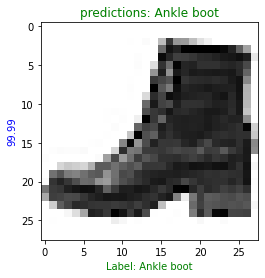

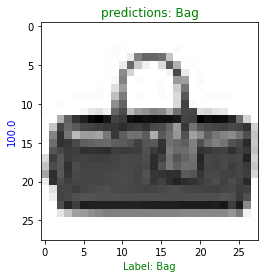

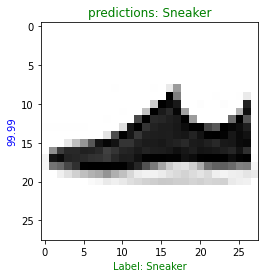

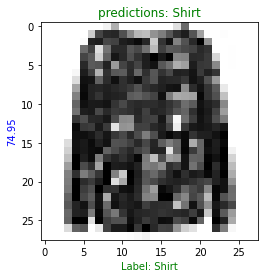

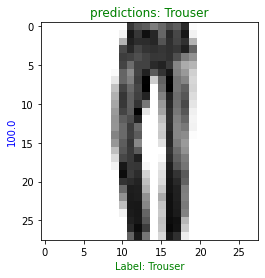

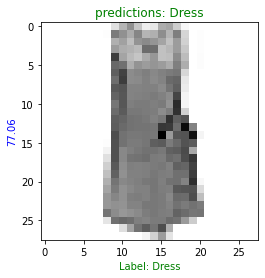

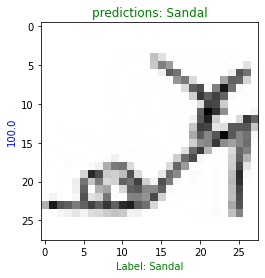

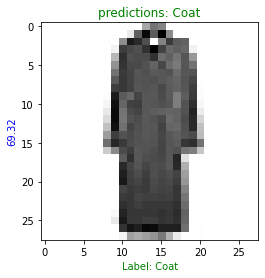

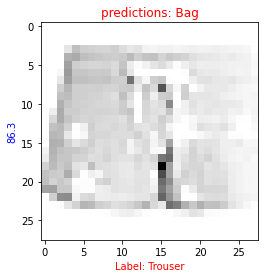

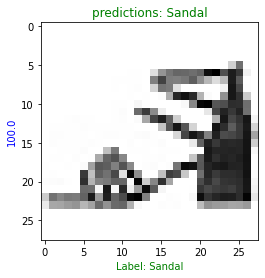

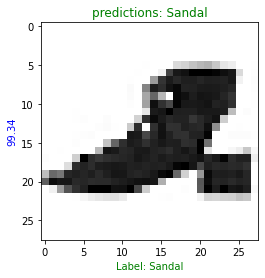

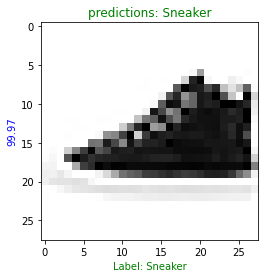

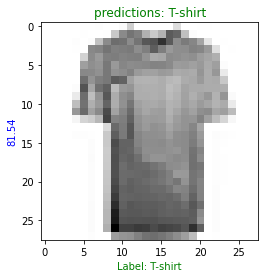

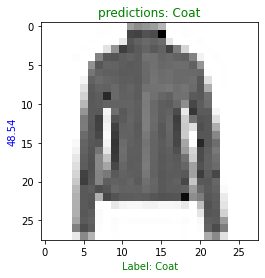

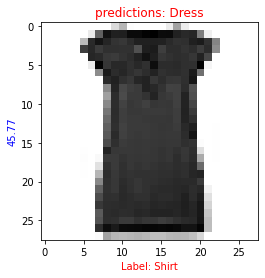

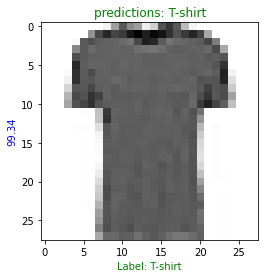

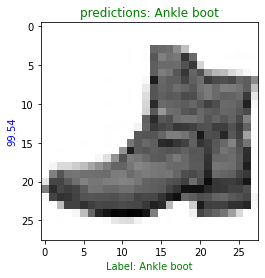

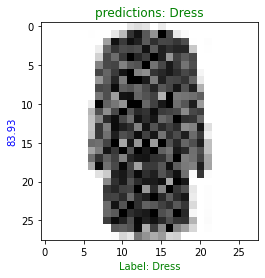

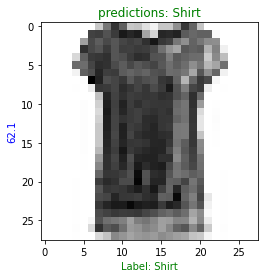

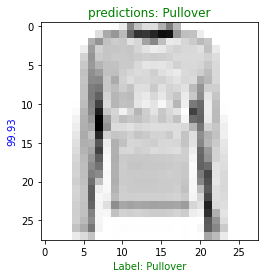

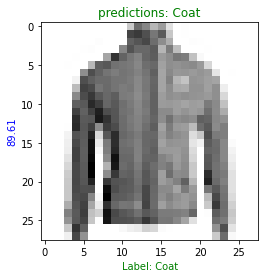

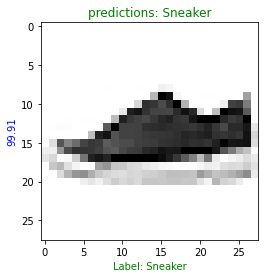

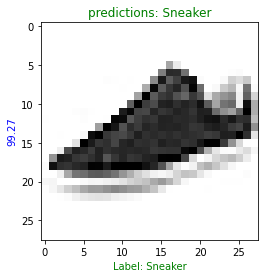

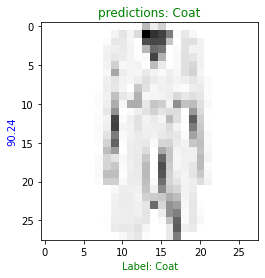

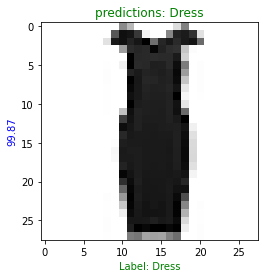

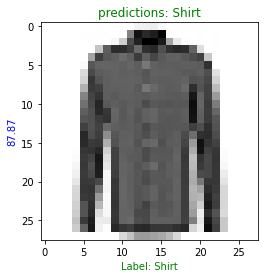

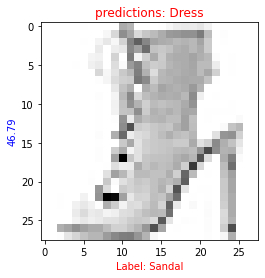

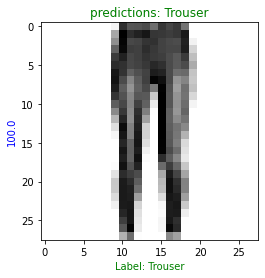

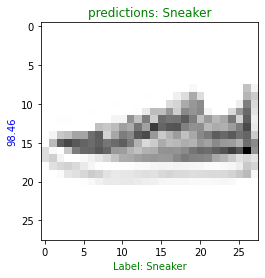

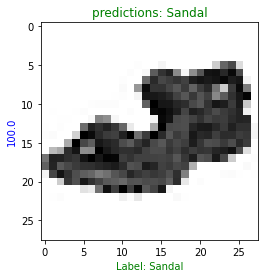

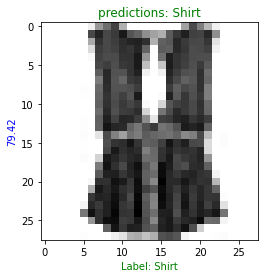

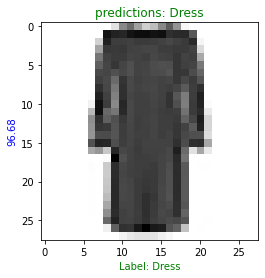

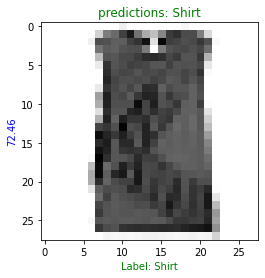

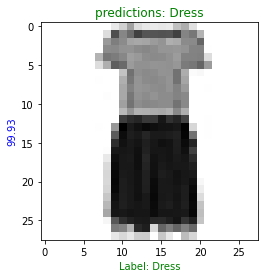

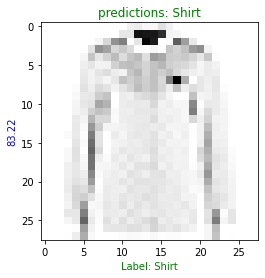

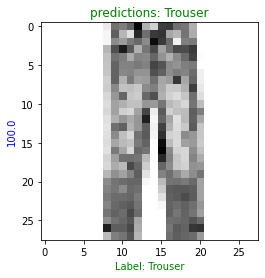

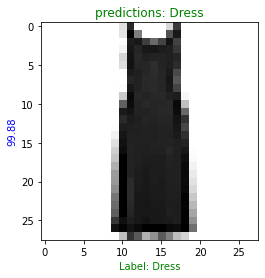

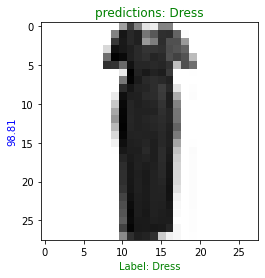

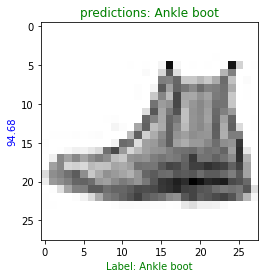

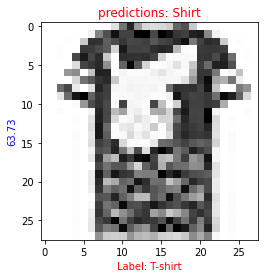

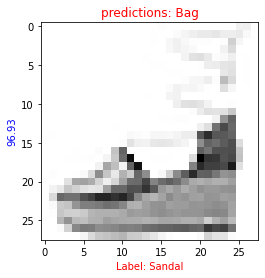

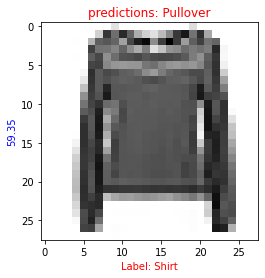

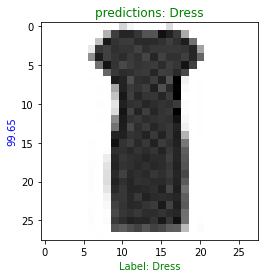

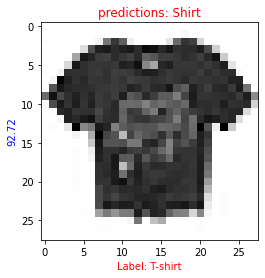

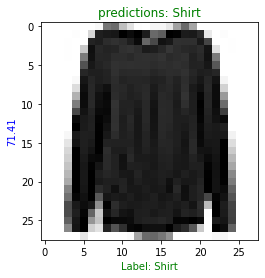

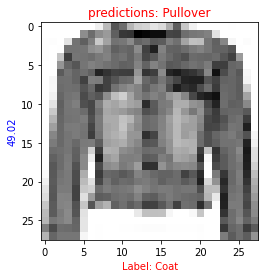

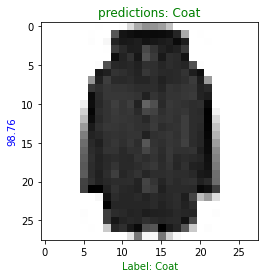

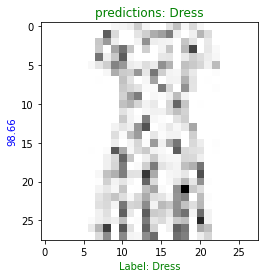

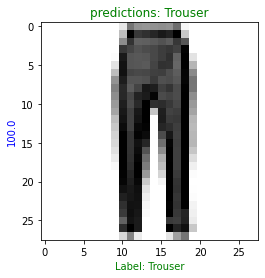

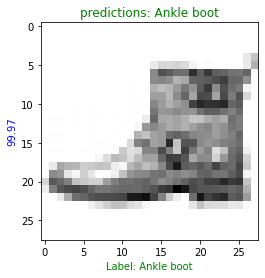

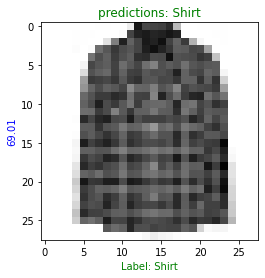

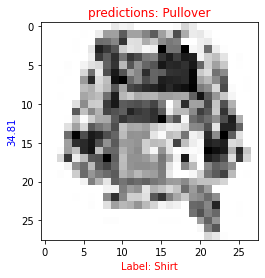

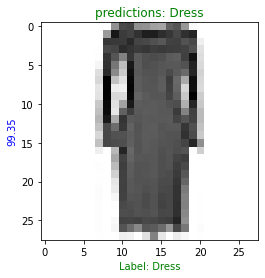

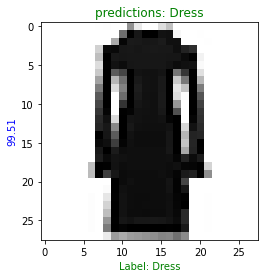

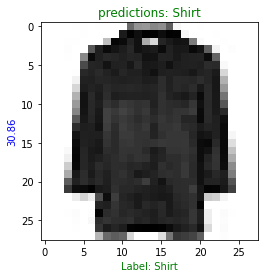

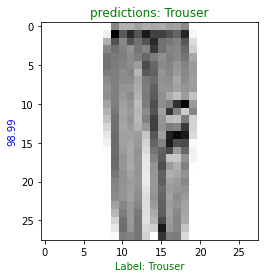

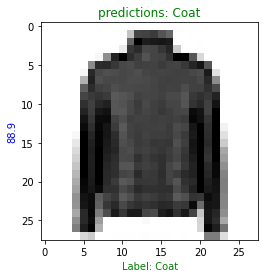

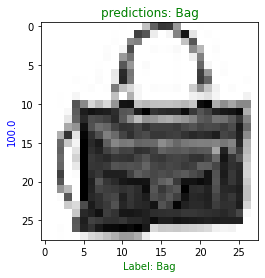

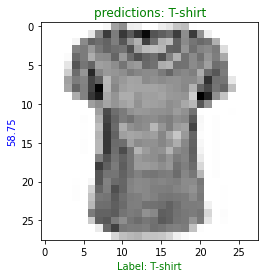

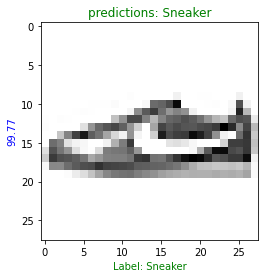

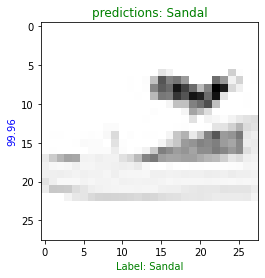

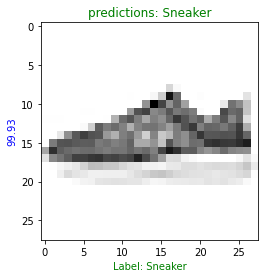

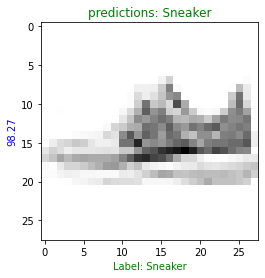

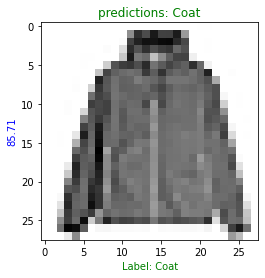

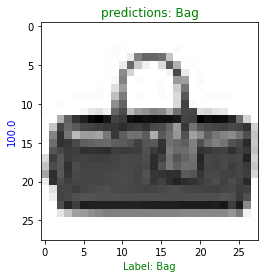

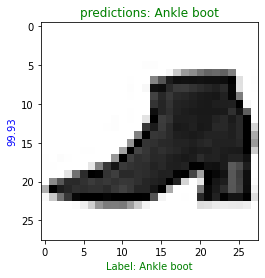

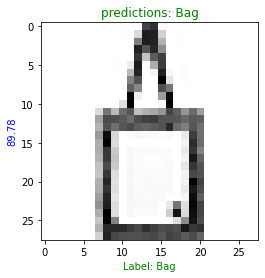

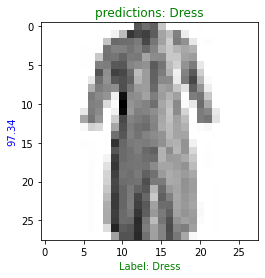

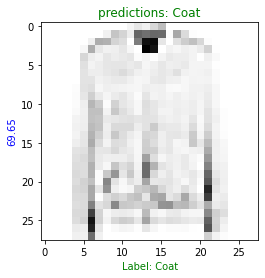

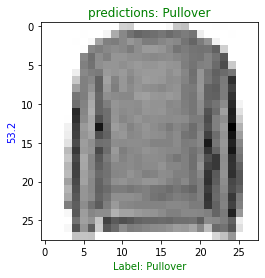

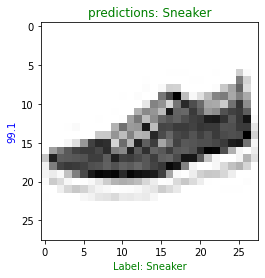

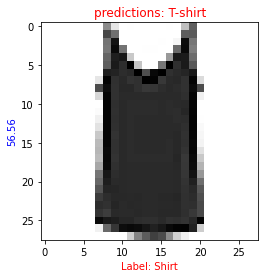

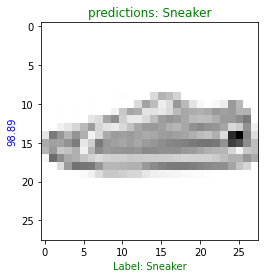

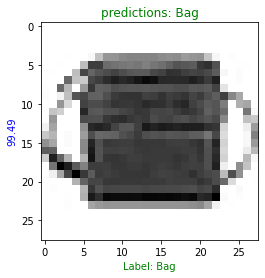

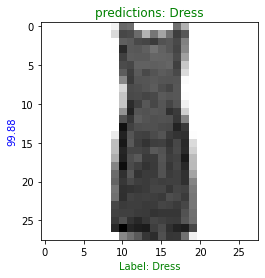

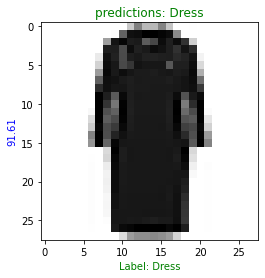

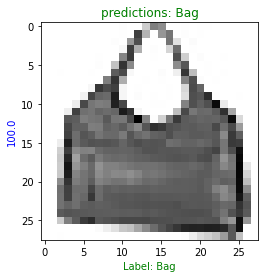

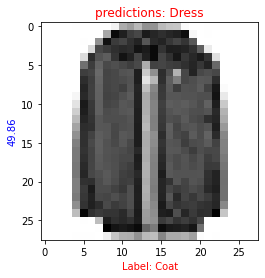

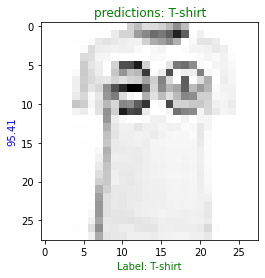

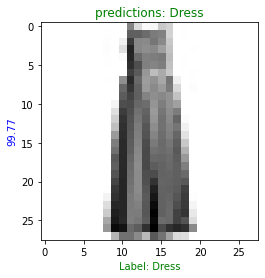

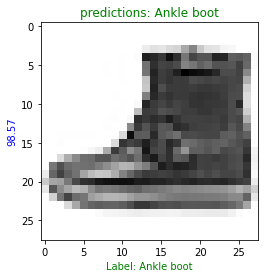

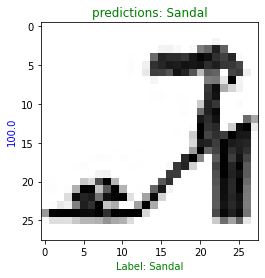

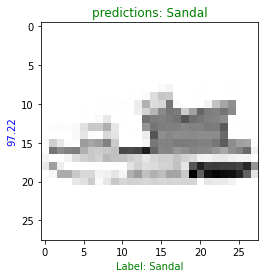

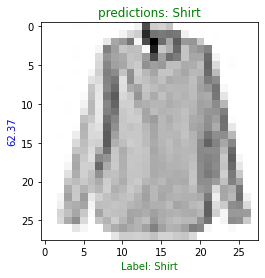

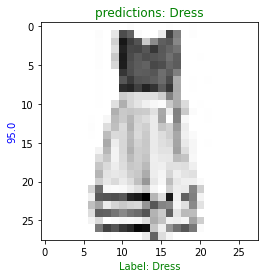

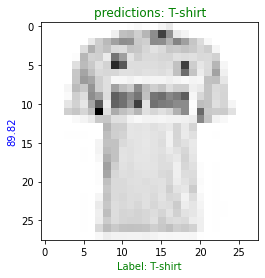

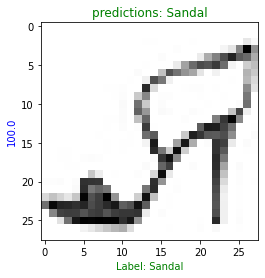

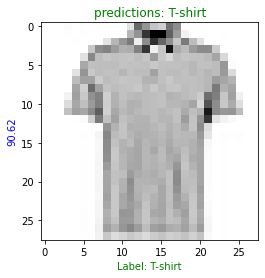

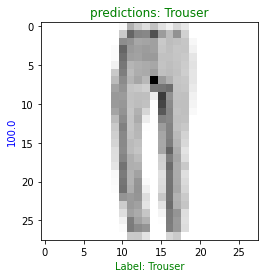

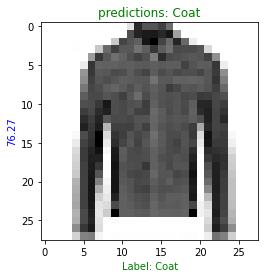

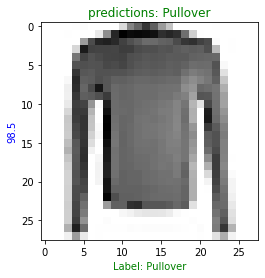

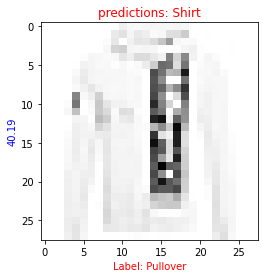

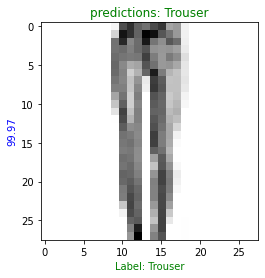

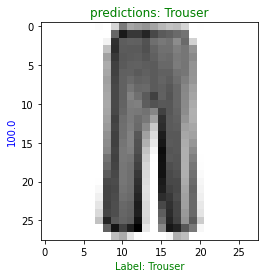

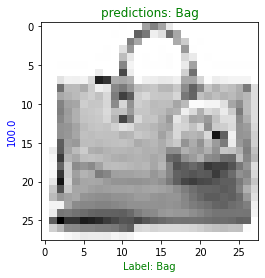

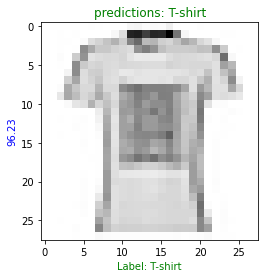

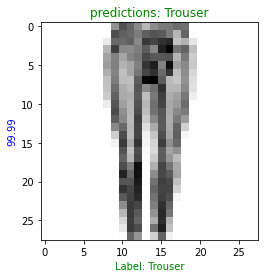

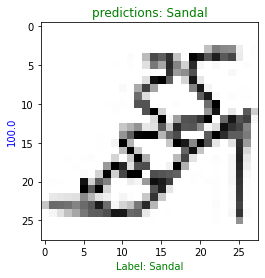

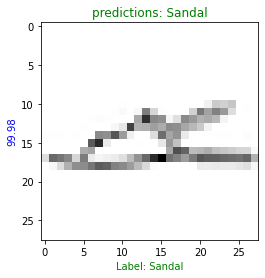

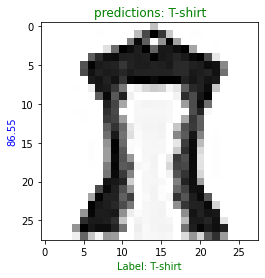

Number of false prediction in 100 samples is 12


In [ ]:
false_pred = []
for i in sa:
  counter = "0"
  if np.argmax(preds[i]) == test_labels[i]:
    color = "green"
  else:
     color = "red" 
     false_pred.append(counter) 
  plt.grid(False)
  plt.xlabel("Label: " + class_label[test_labels[i]], color=color )
  plt.ylabel(str(round(100 *np.max(preds[i]),2)), color="blue")
  plt.title("predictions: " + class_label[np.argmax(preds[i])], color=color)
  plt.imshow(test_images[i], cmap="Greys")
  plt.show()
print(f"Number of false prediction in {len(sa)} samples is {len(false_pred)}")